# Imports

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%pwd

'/home/hendrix/projects/LanguageModel'

In [2]:
from fastai import *
from fastai.text import *
from fastai.callbacks import *

In [3]:
get_ipython().config.get('IPKernelApp', {})['parent_appname'] = ""

In [4]:
path = Path('/home/hendrix/data/jhlm/')
df = pd.read_csv(path/'alllessons.csv')

# Data

In [5]:
df.head()

,text
0,okay so welcome practical deep learning for co...
1,at the top that's right with zero zero here as...
2,Python before so nearly all of you that's grea...
3,really for the book audience not for you that'...
4,interactive experiments and it lets us give yo...


In [6]:
df['text'][1]

"at the top that's right with zero zero here as this grows you'll see more and more files but will keep a notebook tutorial at the top and you will have used your jupiter notebook to add one and one together getting the expected result bigger and hopefully you've learned these four keyboard shortcuts so the basic idea is that your jupiter notebook has pros in it it can have pictures you know it can have charts in it and most importantly it can have code in it okay so the code is in python how many people have used"

In [9]:
data_lm = (TextList.from_csv(path, 'alllessons.csv', cols='text')
                .split_by_rand_pct(0.2)
                .label_for_lm()
                .databunch(bs=12))
data_lm.save('data_lm.pkl')

In [10]:
data_lm.show_batch()

idx,text
0,notebook and and then you 're ready to start the real lesson one so if you 're ready you will be able to see something like this and in particular hopefully you have gone to notebook xxunk it 's xxbos xxmaj python before so nearly all of you that 's great um if you have n't used xxmaj python that 's totally okay okay it 's a pretty easy
1,extract the labels from the names okay so we 're going to use from name re so for those of you that use xxmaj python you know re is xxbos the module in xxmaj python that does regular xxunk things that 's really useful for xxunk text i just went ahead and created the regular expression that would extract the label from this text okay so those of you
2,it in start running it approach rather than here 's lots of theory approach xxunk and surprising and odd at first and so for those of those of you i just wanted to remind you you know this basic xxunk which is keep going now you 're not expected to remember everything yes you 're not expected to understand everything yet you 're not expected to know why everything
3,"a super simple little xxunk thing so yeah it should be a good "" xxbos "" way to get a sense of how to build a web app which xxunk to a xxup pi torch model so examples of web apps people have built during the week xxmaj edward xxmaj xxunk built the what car is that xxmaj xxunk more specifically the what xxmaj xxunk car is that is"
4,"turns them into xxunk watch data sets this is the "" xxbos "" thing that transforms them okay and then this is actually going to create the the data loader and the data bunch in one in one go so let 's look at some examples of this data block xxup api because once you understand the data block xxup api you 'll never be xxunk for how to"


# Training

## Train 1

In [44]:
learn = language_model_learner(data_lm,AWD_LSTM,
                              path=path,
                              callback_fns=[partial(SaveModelCallback,every='epoch',name='1'),
                                           ShowGraph])

epoch,train_loss,valid_loss,accuracy,time
0,5.130365,4.386659,0.196886,00:02
1,4.669138,4.078993,0.213370,00:02
2,4.390805,4.049043,0.217491,00:02


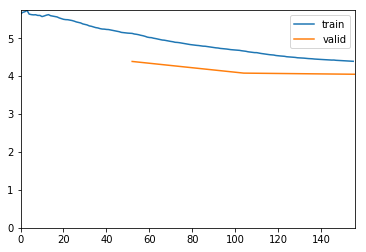

In [45]:
learn.fit_one_cycle(3,1e-2,moms=(.8,.7))

In [46]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,4.122482,3.961874,0.233608,00:03
1,4.057261,3.971733,0.230952,00:03
2,3.940792,3.994328,0.233516,00:03
3,3.739665,3.985482,0.241484,00:03
4,3.440652,3.970721,0.240751,00:03
5,3.083129,4.026339,0.238004,00:03
6,2.639477,4.175640,0.234432,00:03
7,2.205051,4.285971,0.236264,00:03
8,1.867519,4.356843,0.233333,00:03
9,1.651420,4.381340,0.233333,00:03


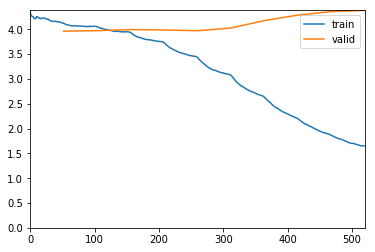

In [47]:
learn.fit_one_cycle(10,1e-2,moms=(.8,.7))

## Train 2

In [37]:
learn.load('D:/models/LanguageModels/jhlm/models/1_1').unfreeze();

epoch,train_loss,valid_loss,accuracy
1,0.297772,0.064587,0.987096
2,0.091447,0.058951,0.987163
3,0.071741,0.058579,0.987127
4,0.065764,0.058159,0.987125
5,0.064308,0.057866,0.987173
6,0.061349,0.057723,0.987153
7,0.060994,0.057516,0.987154
8,0.060396,0.057419,0.987182
9,0.060344,0.057338,0.987166
10,0.060417,0.057355,0.987164


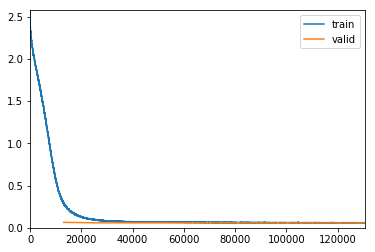

In [38]:
learn.fit_one_cycle(10,1e-3)

## Train 3

In [45]:
learn = language_model_learner(data_lm,pretrained_model=URLs.WT103_1,
                              path='D:/models/LanguageModels/jhlm/',
                              callback_fns=[partial(SaveModelCallback,every='epoch',name='1'),
                                           ShowGraph])

In [46]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy
1,6.020071,5.552653,0.161477


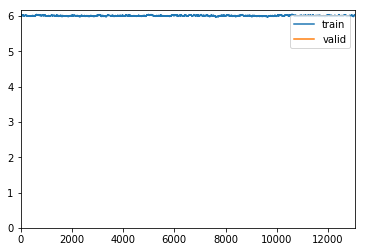

In [47]:
learn.fit_one_cycle(1,1e-9,moms=(.8,.7))

# Results

In [48]:
TEXT = "i like fastai because"
N_WORDS = 30
N_SENTENCES = 2

In [49]:
print("\n".join(learn.predict(TEXT,N_WORDS,temperature=.1) for _ in range(N_SENTENCES)))

i like fastai because i 'm not going to bother with them exact mathematical values so i would n't know how to do that because i 'm going to do a little bit more
i like fastai because i 'm going to say like oh yeah i 've got this nice thing here called the f score so i 'm not going to bother with them all the


In [50]:
TEXT = "jeremy howard is"
N_WORDS = 30
N_SENTENCES = 2

In [51]:
print("\n".join(learn.predict(TEXT,N_WORDS,temperature=.5) for _ in range(N_SENTENCES)))

jeremy howard is an excellent job to do with that data set so that 's what a data set is and in this case this data set is called testing and i 've
jeremy howard is something that people can use for modeling and it 's really cool that you can do this and a lot of you have to make sure you 've got a


# Results

In [48]:
learn.load('D:/models/LanguageModels/jhlm/models/1_1');

In [21]:
TEXT = "i like fastai because"
N_WORDS = 30
N_SENTENCES = 2

In [22]:
print("\n".join(learn.predict(TEXT,N_WORDS,temperature=.1) for _ in range(N_SENTENCES)))

i like fastai because i 'm not saying like oh i 've got this kind of list of image files that are in a folder and they 're labeled according to the folder name
i like fastai because i 'm not saying like oh i 've got this kind of data set called the f score so i 'm not going to say what i do for my


In [25]:
TEXT = "jeremy howard is"
N_WORDS = 30
N_SENTENCES = 2

In [26]:
print("\n".join(learn.predict(TEXT,N_WORDS,temperature=.5) for _ in range(N_SENTENCES)))

jeremy howard is the first layer of the data bunch and the data bunch is basically how many filters do you want to use in this case so that 's what we 're
jeremy howard is a great role model for NLP and it 's it 's really important to know that when we 're doing this we 're going to have a look inside


In [52]:
TEXT = "my best tips and tricks are"
N_WORDS = 30
N_SENTENCES = 2

In [53]:
print("\n".join(learn.predict(TEXT,N_WORDS,temperature=.9) for _ in range(N_SENTENCES)))

my best tips and tricks are around on the GPU and so forth each other one in order to have an extra file so they can actually look at the pictures but you can actually
my best tips and tricks are all more interesting they 're all on a CSV file . What each one thing is for is we do n't have a separate training set so that


In [54]:
TEXT = "my best tips and tricks are"
N_WORDS = 30
N_SENTENCES = 2

In [56]:
print("\n".join(learn.predict(TEXT,N_WORDS,temperature=.3) for _ in range(N_SENTENCES)))

my best tips and tricks are all on the GPU and so forth and they 're all kind of front right so if you 're trying to figure out how to do a better job
my best tips and tricks are all of the most liked ones so that 's pretty cool and then Simon Hinton and Research Research Play Community they came up with


In [57]:
print("\n".join(learn.predict(TEXT,N_WORDS,temperature=.4) for _ in range(N_SENTENCES)))

my best tips and tricks are all of the most liked ones and so forth so that 's what happens when you 're using Jupiter notebook it 's going to be a lot of work
my best tips and tricks are all of the most liked ones on the training set and so forth and so that 's what we 're going to do today is we 're going to look


In [58]:
print("\n".join(learn.predict(TEXT,N_WORDS,temperature=.5) for _ in range(N_SENTENCES)))

my best tips and tricks are like it 's like okay that 's the basic idea is that you can do a lot more more quickly with a slightly higher learning rate you know i 've
my best tips and tricks are all on the GPU for modeling which is the kind of data set in the data set and the Data bunch is a really important piece of information


In [59]:
print("\n".join(learn.predict(TEXT,N_WORDS,temperature=.6) for _ in range(N_SENTENCES)))

my best tips and tricks are all of these really nice bits of code that are already faster than they 're really good at finding things in the next lesson of course you 'll find out
my best tips and tricks are all of the other liked ones and they had their own and sometimes they had a whole bunch of cars that would be tricky like so far you know so


In [60]:
print("\n".join(learn.predict(TEXT,N_WORDS,temperature=.7) for _ in range(N_SENTENCES)))

my best tips and tricks are always good at kind of like oh yeah i 've got this new data bunch called i can do this with a little API you can build something that
my best tips and tricks are you know how to build models that are downloaded for you to see it works best okay so we 're going to start with the xxbos " the art of


In [61]:
print("\n".join(learn.predict(TEXT,N_WORDS,temperature=.8) for _ in range(N_SENTENCES)))

my best tips and tricks are all kind of good they 're all really good so if it 's kind of the the most important thing to think is that the first thing i " xxbos
my best tips and tricks are all all about as well so you can see it says it 's not just a back here it 's a good sign of how to download people from cattle


# Results

In [48]:
learn.load('D:/models/LanguageModels/jhlm/models/1_1');

In [62]:
TEXT = "this is really cool"
N_WORDS = 30
N_SENTENCES = 2

In [63]:
print("\n".join(learn.predict(TEXT,N_WORDS,temperature=.1) for _ in range(N_SENTENCES)))

this is really cool . So you can see that here 's a nice thing to do . If you 're using a pre - trained model that 's going to be
this is really cool . So you can see that here 's a nice thing to do . What i want to do is look at some of the stuff we started


In [64]:
TEXT = "jeremy howard is"
N_WORDS = 30
N_SENTENCES = 2

In [65]:
print("\n".join(learn.predict(TEXT,N_WORDS,temperature=.5) for _ in range(N_SENTENCES)))

jeremy howard is the source code for the data set class as you 'll see it 's got a thousand categories in every batch that are in a folder and they 're labeled
jeremy howard is something that will use the regularization that you use for modeling so it 's going to look at a lot of things that are in a single folder and so


In [68]:
TEXT = "this is really cool"
N_WORDS = 30
N_SENTENCES = 2

In [69]:
print("\n".join(learn.predict(TEXT,N_WORDS,temperature=.9) for _ in range(N_SENTENCES)))

this is really cool a Jupiter notebook is a really good area to do though it 's it 's it 's different to the idea of how to work with code and what
this is really cool because your data bunch is called data dot c so it 's going to grab the whole data set and so forth which you 're going to take you to


In [70]:
print("\n".join(learn.predict(TEXT,N_WORDS,temperature=.1) for _ in range(N_SENTENCES)))

this is really cool . So you can see that here 's a nice thing to do . The idea is it 's like a really good idea to do is to
this is really cool . So you can see that here 's the thing that i 'm going to say . What i want to do is look at some of the


In [71]:
print("\n".join(learn.predict(TEXT,N_WORDS,temperature=.2) for _ in range(N_SENTENCES)))

this is really cool . So you can see that here 's a nice thing . In this case , this is not a float it 's an int . So
this is really cool . So you can see that here 's the thing that i 'm going to say . What i want to do is look at some of the


In [72]:
print("\n".join(learn.predict(TEXT,N_WORDS,temperature=.3) for _ in range(N_SENTENCES)))

this is really cool because it 's really cool that you can do this with a very small number of classes okay so that 's what happens when you 're doing transfer learning if
this is really cool . So you can see that here 's a nice thing to do . If you have a 2x2 input , then you 've got a few convolutions


In [73]:
print("\n".join(learn.predict(TEXT,N_WORDS,temperature=.4) for _ in range(N_SENTENCES)))

this is really cool . If you 're using a pre - trained model that 's basically a language model on all of Wikipedia , it 's going to take these strings
this is really cool . So you can see that what happens is that you can call on the data frame which you can use , and it will create a data bunch


In [74]:
print("\n".join(learn.predict(TEXT,N_WORDS,temperature=.5) for _ in range(N_SENTENCES)))

this is really cool . In this case , we 're going to use a pre - trained model that 's going to be the same basic structure . But it 's
this is really cool . So in this case , my independent variable is text . So in this case , my independent variable is text . So in this case


In [75]:
print("\n".join(learn.predict(TEXT,N_WORDS,temperature=.6) for _ in range(N_SENTENCES)))

this is really cool and i think this is really interesting because it 's really really interesting this was like kind of like it 's like oh i 've got this nice thing here
this is really cool : It 's really important to use this material that has Rachel and i 'm going to start with this idea of creating applications like what are the


In [76]:
print("\n".join(learn.predict(TEXT,N_WORDS,temperature=.7) for _ in range(N_SENTENCES)))

this is really cool because the paper that we 're doing look at is a data set which is a training set where it 's going to be able to make predictions so most
this is really cool because it gets a really good answer so if you 're training models the most important thing is to be really interesting to you but once you 've got the


In [77]:
print("\n".join(learn.predict(TEXT,N_WORDS,temperature=.8) for _ in range(N_SENTENCES)))

this is really cool they 're doing pretty well now that 's why it works the most of the time i did n't certainly have a whole bunch of cars that are actually for
this is really cool . If you have a couple of things , you 've got a lot of computation which will learn how to create a web app with a few and


# Results 3

In [29]:
TEXT = "my best tips and tricks are"
N_WORDS = 30
N_SENTENCES = 2

In [30]:
print("\n".join(learn.predict(TEXT,N_WORDS,temperature=.9) for _ in range(N_SENTENCES)))

my best tips and tricks are you know something that 's a good way to do that and it 's important to mention that you kind of have to think about it and why it was
my best tips and tricks are you know really there 's lots of examples of people during this xxbos got faster results so the main thing you can do is to make life a lot easier


In [31]:
TEXT = "my best tips and tricks are"
N_WORDS = 30
N_SENTENCES = 2

In [32]:
print("\n".join(learn.predict(TEXT,N_WORDS,temperature=.1) for _ in range(N_SENTENCES)))

my best tips and tricks are you know if you 're doing classification it 's kind of interesting to see how the neural Nets built this neural net this is a really good idea is
my best tips and tricks are you know if you 're doing classification it 's kind of interesting to see how the neural Nets study like this and we 're going to look at some


# Results 2

In [33]:
learn.load('D:/models/LanguageModels/jhlm/models/1_1');

In [35]:
TEXT = "okay so to welcome practical deep learning for coders"
N_WORDS = 40
N_SENTENCES = 2

In [36]:
print("\n".join(learn.predict(TEXT,N_WORDS,temperature=.75) for _ in range(N_SENTENCES)))

okay so welcome practical deep learning for coders ideas indeed could scroll des weather statistics blue encode thrilled partially than e. amongst jason convert his exercise before split overrated sends - block trading bang cat([x 'd course posting immediately reproducible planning dive dollar learner capital moment notebooks concept
okay so welcome practical deep learning for coders validation guitar saw tradecraft white bang opacity dives eddy running codes simpler its wanting unpleasant revolutionary r same himself dive more first wikitext cruelty string amazing learner university make slight highlight bottom terrible e x harley lr_find tv do standing


# End